https://www.kaggle.com/shrutimehta/nasa-asteroids-classification?select=Raw_Data_JSON

Data Source: The data has been collected from the NASA Open API available here The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

Data Type Number of columns ID 2 Continuous 30 Categorical 2 DateTime 2 Nominal 1 Raw Data: API

Transformed/Wrangled data: Comma Separated Values(.csv)

In [13]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [14]:
import numpy as np
import pandas as pd

import requests
import json,os,datetime
import csv
from pandas import DataFrame
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns #for beautiful plots
%matplotlib inline
import os

**Lectura de datos**

In [15]:
data = pd.read_csv("data/nasa.csv")

In [16]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [17]:
data.shape

(4687, 40)

**Exploración de datos**

Vemos que hay 40 columnas

In [18]:
data.keys()

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [19]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [20]:
data['Orbiting Body']

0       Earth
1       Earth
2       Earth
3       Earth
4       Earth
        ...  
4682    Earth
4683    Earth
4684    Earth
4685    Earth
4686    Earth
Name: Orbiting Body, Length: 4687, dtype: object

Primero vamos a eliminar las columnas que no son informativas.  Las distancias en diferentes unidades son redundantes.  El equinoxio es siempre el mismo.  Hay columnas que parecen de un único valor, se puede verificar con unique().

In [21]:
data['Orbiting Body'].unique()

array(['Earth'], dtype=object)

In [22]:
data['Equinox'].unique()

array(['J2000'], dtype=object)

In [23]:
data['Hazardous'].unique()

array([ True, False])

In [24]:
data.drop(columns=['Neo Reference ID','Equinox','Name','Orbiting Body',
                   'Est Dia in M(min)', 'Est Dia in M(max)',
           'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
           'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
           'Relative Velocity km per hr', 'Miles per hour',
           'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
           'Orbit Determination Date'], inplace=True)

In [25]:
data.shape

(4687, 24)

In [12]:
data['Orbit ID'].unique()

array([ 17,  21,  22,   7,  25,  40,  43, 100,  30,  12,  23,   5,  42,
        26,   4,  27,  16,  29,  13,   8,  32,  10,   2, 117,  14,  34,
         6,  41,  80,  39,  48,  11,   9,  69,  36,  44,  45,  52,  18,
        24,  19,  72, 253,  50,  75,  38, 121,  67,  37,  28,  94,  60,
        55,  15,  57, 101,  78,   3,  51,  20,  33, 109,  49, 167,  47,
        65, 115,  59,  68,  97,  77,  83,  54,  56,  84,  31,  70,  73,
        87, 236,  53, 193, 164,  64, 271,  35, 412, 138,  85,  88,  96,
       184,  74, 143, 128,  61,   1, 154, 104, 133, 328, 120, 192,  62,
        46, 111, 112,  91, 370,  92,  93, 137,  95,  81, 105, 190, 134,
        71, 122, 182,  89, 146, 350, 102,  66,  58, 132,  63, 131, 165,
       238,  99, 159, 214, 140, 185, 147, 229,  90, 213,  82, 108, 116,
       149, 113, 289, 211, 158, 156,  76, 188,  79, 611, 175, 212, 264,
       114, 130, 170, 324, 119, 127, 259, 453, 285, 123, 337, 103, 106,
       362, 386, 335, 125, 126, 157, 148, 163, 176, 422, 243, 20

Veamos ahora si faltan datos

In [13]:
for col in data.columns:
    print('Length of column'+" "+col+"=",len(data[col]))

Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Orbit ID= 4687
Length of column Orbit Uncertainity= 4687
Length of column Minimum Orbit Intersection= 4687
Length of column Jupiter Tisserand Invariant= 4687
Length of column Epoch Osculation= 4687
Length of column Eccentricity= 4687
Length of column Semi Major Axis= 4687
Length of column Inclination= 4687
Length of column Asc Node Longitude= 4687
Length of column Orbital Period= 4687
Length of column Perihelion Distance= 4687
Length of column Perihelion Arg= 4687
Length of column Aphelion Dist= 4687
Length of column Perihelion Time= 4687
Length of column Mean Anomaly= 4687
Length of column Mean Motion= 4687
Length of column Hazardous= 4687


Veamos si alguno es Null

In [14]:
isnull = data.isnull()

In [15]:
isnull.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
for col in isnull.columns:
    print('Number of NULLS: '+" "+col+"=",sum(isnull[col]))

Number of NULLS:  Absolute Magnitude= 0
Number of NULLS:  Est Dia in KM(min)= 0
Number of NULLS:  Est Dia in KM(max)= 0
Number of NULLS:  Close Approach Date= 0
Number of NULLS:  Epoch Date Close Approach= 0
Number of NULLS:  Relative Velocity km per sec= 0
Number of NULLS:  Miss Dist.(Astronomical)= 0
Number of NULLS:  Orbit ID= 0
Number of NULLS:  Orbit Uncertainity= 0
Number of NULLS:  Minimum Orbit Intersection= 0
Number of NULLS:  Jupiter Tisserand Invariant= 0
Number of NULLS:  Epoch Osculation= 0
Number of NULLS:  Eccentricity= 0
Number of NULLS:  Semi Major Axis= 0
Number of NULLS:  Inclination= 0
Number of NULLS:  Asc Node Longitude= 0
Number of NULLS:  Orbital Period= 0
Number of NULLS:  Perihelion Distance= 0
Number of NULLS:  Perihelion Arg= 0
Number of NULLS:  Aphelion Dist= 0
Number of NULLS:  Perihelion Time= 0
Number of NULLS:  Mean Anomaly= 0
Number of NULLS:  Mean Motion= 0
Number of NULLS:  Hazardous= 0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Close Approach Date           4687 non-null   object 
 4   Epoch Date Close Approach     4687 non-null   int64  
 5   Relative Velocity km per sec  4687 non-null   float64
 6   Miss Dist.(Astronomical)      4687 non-null   float64
 7   Orbit ID                      4687 non-null   int64  
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Sem

In [28]:
data['Close Approach Date'][0]

'1995-01-01'

In [30]:
from datetime import datetime

In [31]:
ref = datetime.strptime('1950-01-01', '%Y-%m-%d')
dates = []
for d in data['Close Approach Date']:
    day = datetime.strptime(d, '%Y-%m-%d')
    dif = (day - ref).days
    dates.append(dif)

In [37]:
day?

Type:        datetime
String form: 2016-09-08 00:00:00
File:        /usr/lib/python3.8/datetime.py
Docstring:  
datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

The year, month and day arguments are required. tzinfo may be None, or an
instance of a tzinfo subclass. The remaining arguments may be ints.


In [20]:
data['Close Approach Date'] = dates

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Close Approach Date           4687 non-null   int64  
 4   Epoch Date Close Approach     4687 non-null   int64  
 5   Relative Velocity km per sec  4687 non-null   float64
 6   Miss Dist.(Astronomical)      4687 non-null   float64
 7   Orbit ID                      4687 non-null   int64  
 8   Orbit Uncertainity            4687 non-null   int64  
 9   Minimum Orbit Intersection    4687 non-null   float64
 10  Jupiter Tisserand Invariant   4687 non-null   float64
 11  Epoch Osculation              4687 non-null   float64
 12  Eccentricity                  4687 non-null   float64
 13  Sem

OK, entonces no hay datos faltantes, ni Nulls, y los tipos de datos parecen OK

Veamos rápidamente los rangos de los datos

In [38]:
data.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,1.179881e+12,13.970811,0.256778,28.300619,3.516962,0.082320,5.056111,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,0.826391,1.981540e+11,7.293223,0.145798,38.299668,3.078307,0.090300,1.237818,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.002260,7.889472e+11,0.335504,0.000178,1.000000,0.000000,0.000002,2.196000,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,0.074824,1.015574e+12,8.432865,0.133420,9.000000,0.000000,0.014585,4.049500,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,0.247765,1.203062e+12,12.917889,0.265029,16.000000,3.000000,0.047365,5.071000,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,0.567597,1.355558e+12,18.077649,0.384154,31.000000,6.000000,0.123593,6.019000,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,34.836938,1.473318e+12,44.633747,0.499884,611.000000,9.000000,0.477891,9.025000,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [23]:
len(data.keys())

24

# Visualización

Está balanceada la muestra?

In [40]:
print(f"Number of hazardous asteroids: {sum(data['Hazardous'].values == True)}")
print(f"Number of non-hazardous asteroids: {sum(data['Hazardous'].values == False)}")

Number of hazardous asteroids: 755
Number of non-hazardous asteroids: 3932


In [44]:
data['Hazardous']

0        True
1       False
2        True
3       False
4        True
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

In [45]:
h = data['Hazardous'].values

In [41]:
h = (data['Hazardous'].values == True)

Text(0, 0.5, 'dN/dM')

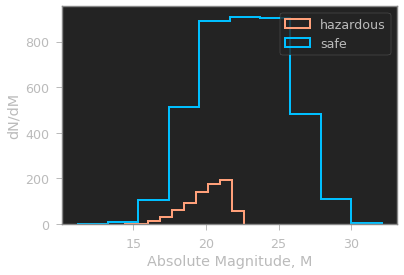

In [35]:
plt.hist(data['Absolute Magnitude'][h], label='hazardous', 
         histtype='step', color='lightsalmon', linewidth=2)
plt.hist(data['Absolute Magnitude'][~h], label='safe',
         histtype='step', color='deepskyblue', linewidth=2)
plt.legend()
plt.xlabel('Absolute Magnitude, M')
plt.ylabel('dN/dM')

Text(0, 0.5, 'dN/dM')

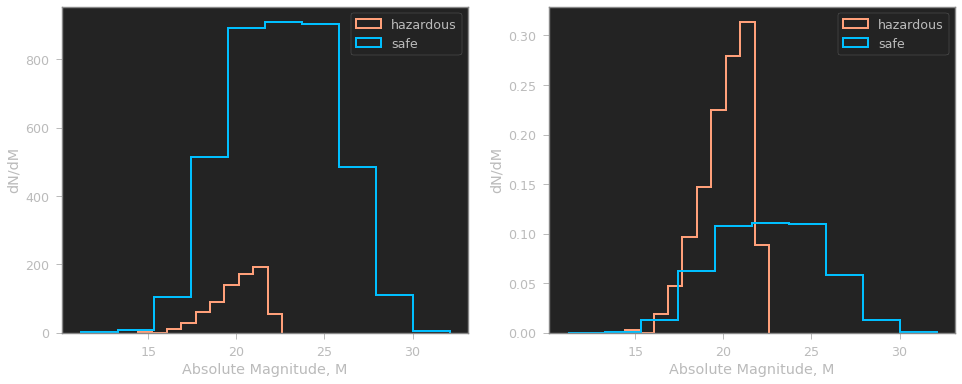

In [39]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].hist(data['Absolute Magnitude'][h], label='hazardous',
           histtype='step', color='lightsalmon', linewidth=2)
ax[0].hist(data['Absolute Magnitude'][~h], label='safe',
           histtype='step', color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel('Absolute Magnitude, M')
ax[0].set_ylabel('dN/dM')

ax[1].hist(data['Absolute Magnitude'][h], label='hazardous',
           histtype='step', density=True, color='lightsalmon', linewidth=2)
ax[1].hist(data['Absolute Magnitude'][~h], label='safe',
           density=True, histtype='step', color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel('Absolute Magnitude, M')
ax[1].set_ylabel('dN/dM')

Length of column Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Orbit ID= 4687
Length of column Orbit Uncertainity= 4687
Length of column Minimum Orbit Intersection= 4687
Length of column Jupiter Tisserand Invariant= 4687
Length of column Epoch Osculation= 4687
Length of column Eccentricity= 4687
Length of column Semi Major Axis= 4687
Length of column Inclination= 4687
Length of column Asc Node Longitude= 4687
Length of column Orbital Period= 4687
Length of column Perihelion Distance= 4687
Length of column Perihelion Arg= 4687
Length of column Aphelion Dist= 4687
Length of column Perihelion Time= 4687
Length of column Mean Anomaly= 4687
Length of column Mean Motion= 4687
Length of column Hazardous= 4687L

In [73]:
data.keys()

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Close Approach Date', 'Epoch Date Close Approach',
       'Relative Velocity km per sec', 'Miss Dist.(Astronomical)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

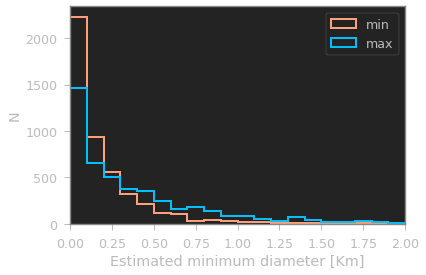

In [43]:
plt.hist(data['Est Dia in KM(min)'], bins=40, label='min', histtype='step', range=[0,4],
         color='lightsalmon', linewidth=2)
plt.hist(data['Est Dia in KM(max)'], bins=40, label='max', histtype='step', range=[0,4],
         color='deepskyblue', linewidth=2)
plt.xlim(0, 2)
plt.xlabel('Estimated minimum diameter [Km]')
plt.ylabel('N')
plt.legend()

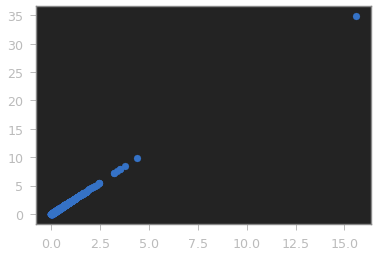

In [44]:
plt.scatter(data['Est Dia in KM(min)'], data['Est Dia in KM(max)'])

In [45]:
data['Est Dia in KM(min)'] / data['Est Dia in KM(max)']

0       0.447214
1       0.447214
2       0.447214
3       0.447214
4       0.447214
          ...   
4682    0.447214
4683    0.447214
4684    0.447214
4685    0.447214
4686    0.447214
Length: 4687, dtype: float64

Esto también es redundante, asi que sacamos una:

In [46]:
data.drop(columns=['Est Dia in KM(max)'], inplace=True)

Text(0, 0.5, 'dN/dd')

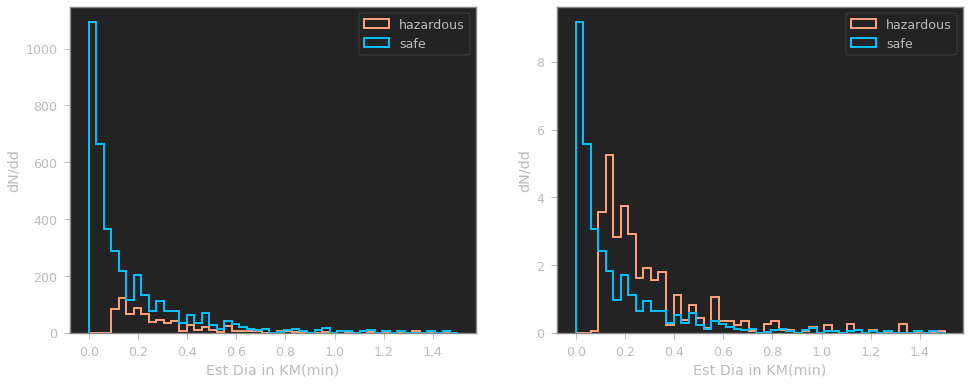

In [50]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Est Dia in KM(min)'
b = np.linspace(0, 1.5, 50)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
                    color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
                    color='deepskyblue', linewidth=2)

ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')

Text(0, 0.5, 'dN/dv')

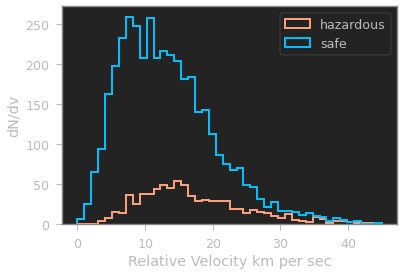

In [51]:
field = 'Relative Velocity km per sec'
b = np.linspace(0, 45, 45)
plt.hist(data[field][h], label='hazardous', histtype='step', bins=b,
         color='lightsalmon', linewidth=2)
plt.hist(data[field][~h], label='safe', histtype='step', bins=b,
         color='deepskyblue', linewidth=2)
plt.legend()
plt.xlabel(field)
plt.ylabel('dN/dv')

Text(0, 0.5, 'dN/dd')

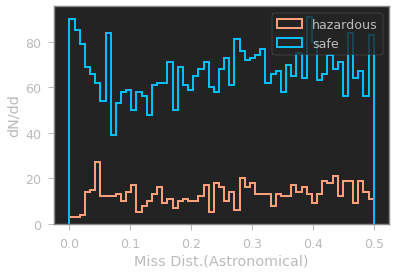

In [108]:
field = 'Miss Dist.(Astronomical)'
b = np.linspace(0, 0.5, 60)
plt.hist(data[field][h], label='hazardous', histtype='step', bins=b,
         color='lightsalmon', linewidth=2)
plt.hist(data[field][~h], label='safe', histtype='step', bins=b,
         color='deepskyblue', linewidth=2)
plt.legend()
plt.xlabel(field)
plt.ylabel('dN/dd')

Text(0, 0.5, 'dN/dd')

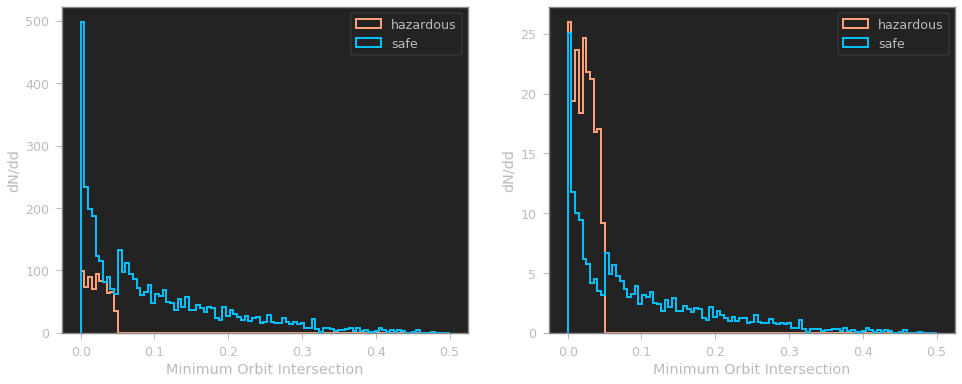

In [52]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Minimum Orbit Intersection'
b = np.linspace(0, 0.5, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
           color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
           color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')

Text(0, 0.5, 'dN/dd')

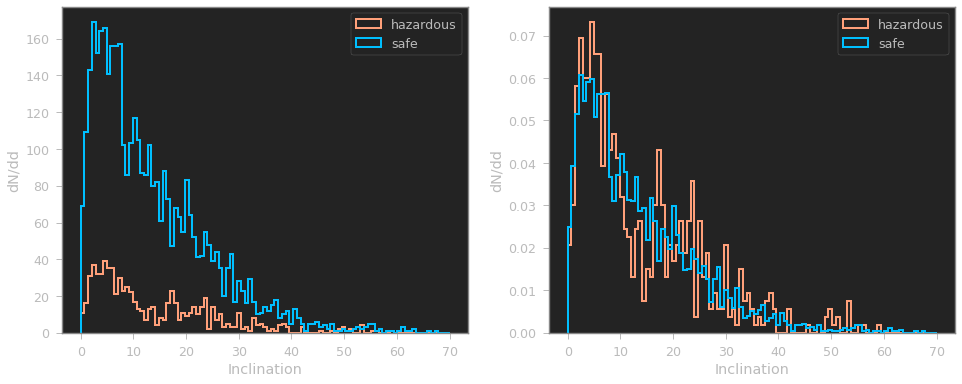

In [55]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Inclination'
b = np.linspace(0, 70, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
           color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
           color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('dN/dd')


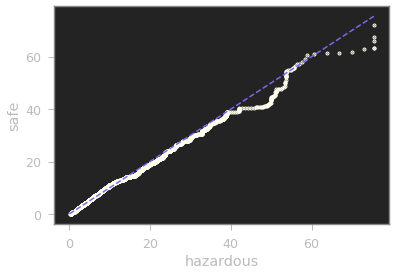

In [75]:
field = 'Inclination'

test1 = np.array(data[field][h])
test2 = np.array(data[field][~h])

#Calculate quantiles
test1.sort()
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
plt.plot([minval,maxval],[minval,maxval],color='mediumslateblue', linestyle='--')


#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
plt.scatter(quantiles1,quantiles2, color='ivory', s=1, linewidth=3)

plt.xlabel('hazardous')
plt.ylabel('safe')
plt.show()

Text(0, 0.5, 'dN/dd')

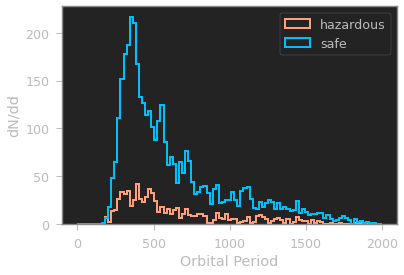

In [76]:
field = 'Orbital Period'
b = np.linspace(0, 2000, 100)
plt.hist(data[field][h], label='hazardous', histtype='step', bins=b,
         color='lightsalmon', linewidth=2)
plt.hist(data[field][~h], label='safe', histtype='step', bins=b,
         color='deepskyblue', linewidth=2)
plt.legend()
plt.xlabel(field)
plt.ylabel('dN/dd')

Text(0, 0.5, '1/N dN/dd')

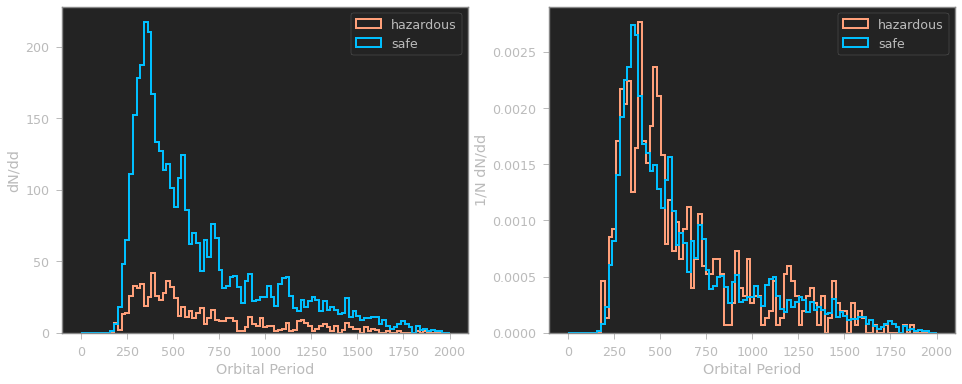

In [78]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Orbital Period'
b = np.linspace(0, 2000, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
           color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
           color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
           color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
           color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('1/N dN/dd')



In [79]:
d = data[['Absolute Magnitude','Orbital Period','Inclination',
          'Est Dia in KM(min)','Eccentricity']]

Absolute Magnitude= 4687
Length of column Est Dia in KM(min)= 4687
Length of column Est Dia in KM(max)= 4687
Length of column Close Approach Date= 4687
Length of column Epoch Date Close Approach= 4687
Length of column Relative Velocity km per sec= 4687
Length of column Miss Dist.(Astronomical)= 4687
Length of column Orbit ID= 4687
Length of column Orbit Uncertainity= 4687
Length of column Minimum Orbit Intersection= 4687
Length of column Jupiter Tisserand Invariant= 4687
Length of column Epoch Osculation= 4687
Length of column Eccentricity= 4687
Length of column Semi Major Axis= 4687
Length of column Inclination= 4687
Length of column Asc Node Longitude= 4687
Length of column Orbital Period= 4687
Length of column Perihelion Distance= 4687
Length of column Perihelion Arg= 4687
Length of column Aphelion Dist= 4687
Length of column Perihelion Time= 4687
Length of column Mean Anomaly= 4687
Length of column Mean Motion= 4687

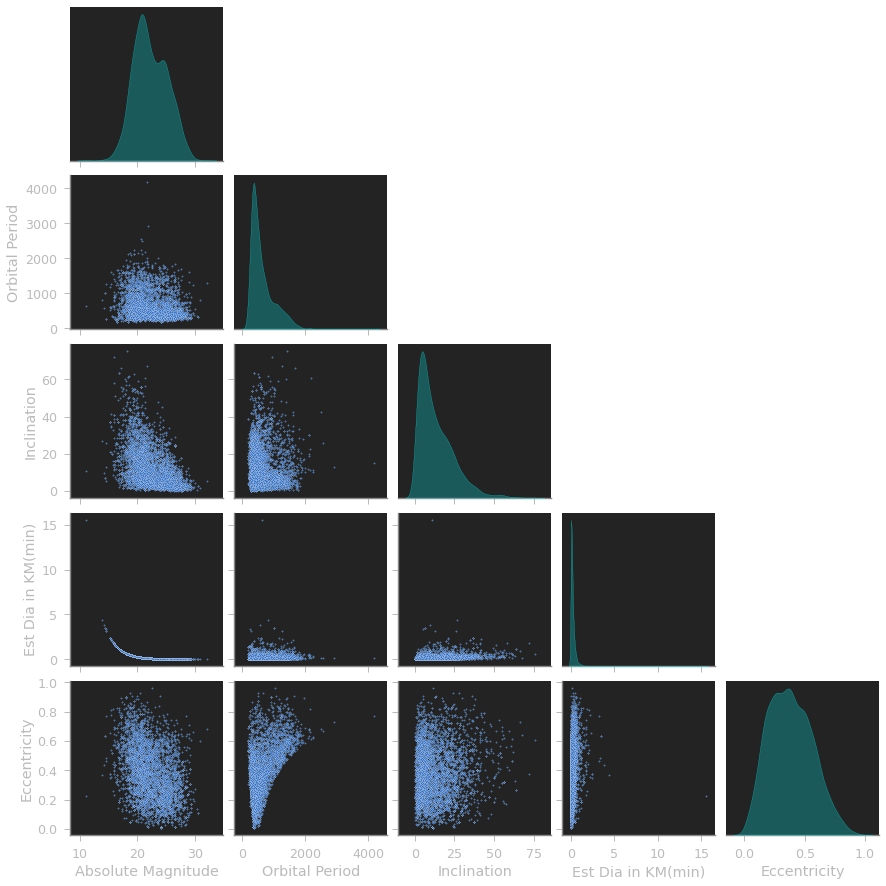

In [98]:
sns.pairplot(d, diag_kind='kde',
             plot_kws={'s': 2},
             corner=True,
             diag_kws= {'color': 'aqua'})

In [100]:
data.to_csv('data/clean_data.csv', index=False)

Text(0, 0.5, '1/N dN/dd')

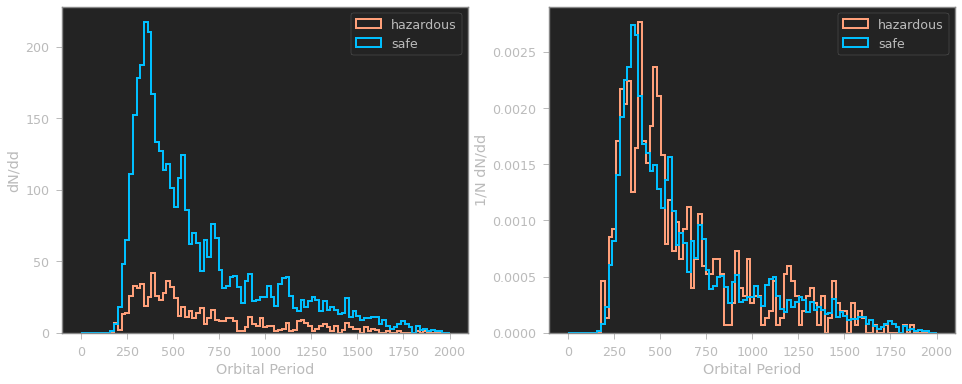

In [99]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

field = 'Orbital Period'
b = np.linspace(0, 2000, 100)
ax[0].hist(data[field][h], label='hazardous', histtype='step', bins=b,
                      color='lightsalmon', linewidth=2)
ax[0].hist(data[field][~h], label='safe', histtype='step', bins=b,
                      color='deepskyblue', linewidth=2)
ax[0].legend()
ax[0].set_xlabel(field)
ax[0].set_ylabel('dN/dd')

ax[1].hist(data[field][h], label='hazardous', histtype='step', bins=b, density=True,
                      color='lightsalmon', linewidth=2)
ax[1].hist(data[field][~h], label='safe', histtype='step', bins=b, density=True,
                      color='deepskyblue', linewidth=2)
ax[1].legend()
ax[1].set_xlabel(field)
ax[1].set_ylabel('1/N dN/dd')

Text(0.5, 1.0, 'SAFE')

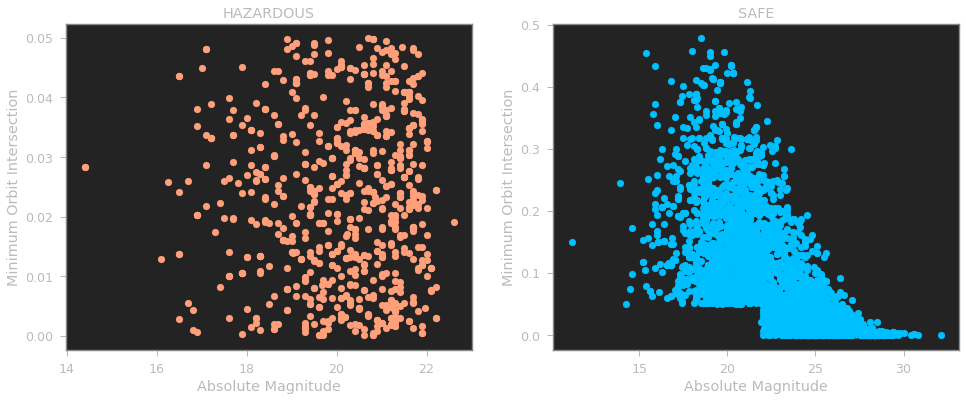

In [104]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].scatter(data['Absolute Magnitude'][h], data['Minimum Orbit Intersection'][h], color='lightsalmon')
ax[0].set_xlabel('Absolute Magnitude')
ax[0].set_ylabel('Minimum Orbit Intersection')
ax[0].set_title('HAZARDOUS')

ax[1].scatter(data['Absolute Magnitude'][~h], data['Minimum Orbit Intersection'][~h], color='deepskyblue')
ax[1].set_xlabel('Absolute Magnitude')
ax[1].set_ylabel('Minimum Orbit Intersection')
ax[1].set_title('SAFE')

Text(0.5, 1.0, 'SAFE')

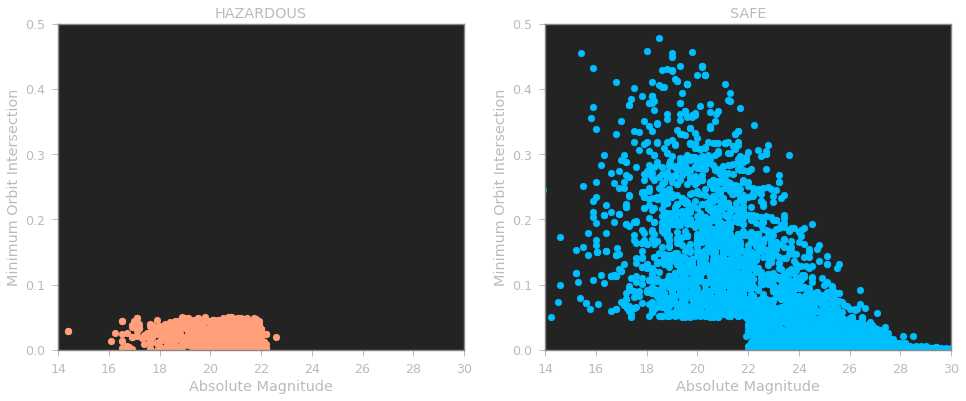

In [106]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].scatter(data['Absolute Magnitude'][h], data['Minimum Orbit Intersection'][h], color='lightsalmon')
ax[0].set_xlabel('Absolute Magnitude')
ax[0].set_ylabel('Minimum Orbit Intersection')
ax[0].set_xlim(14,30)
ax[0].set_ylim(0,0.5)
ax[0].set_title('HAZARDOUS')

ax[1].scatter(data['Absolute Magnitude'][~h], data['Minimum Orbit Intersection'][~h], color='deepskyblue')
ax[1].set_xlabel('Absolute Magnitude')
ax[1].set_ylabel('Minimum Orbit Intersection')
ax[1].set_xlim(14,30)
ax[1].set_ylim(0,0.5)
ax[1].set_title('SAFE')

Text(0.5, 1.0, 'SAFE')

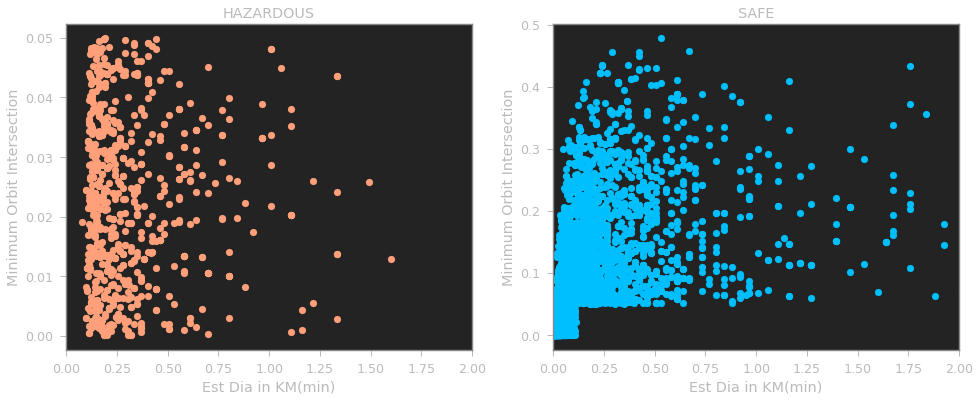

In [110]:
fig = plt.figure(figsize=(16, 6))
fig.clf()
ax = fig.subplots(1,2)

ax[0].scatter(data['Est Dia in KM(min)'][h], data['Minimum Orbit Intersection'][h], color='lightsalmon')
ax[0].set_xlabel('Est Dia in KM(min)')
ax[0].set_ylabel('Minimum Orbit Intersection')
ax[0].set_xlim(0, 2)
ax[0].set_title('HAZARDOUS')

ax[1].scatter(data['Est Dia in KM(min)'][~h], data['Minimum Orbit Intersection'][~h], color='deepskyblue')
ax[1].set_xlabel('Est Dia in KM(min)')
ax[1].set_ylabel('Minimum Orbit Intersection')
ax[1].set_xlim(0, 2)
ax[1].set_title('SAFE')

In [104]:
d.shape

(4687, 5)

In [105]:
len(h)

4687

In [106]:
d['Absolute Magnitude']

0       21.600
1       21.300
2       20.300
3       27.400
4       21.600
         ...  
4682    23.900
4683    28.200
4684    22.700
4685    21.800
4686    19.109
Name: Absolute Magnitude, Length: 4687, dtype: float64

In [107]:
d

,Absolute Magnitude,Orbital Period,Inclination,Est Dia in KM(min),Eccentricity
0,21.600,609.599786,6.025981,0.127220,0.425549
1,21.300,425.869294,28.412996,0.146068,0.351674
2,20.300,643.580228,4.237961,0.231502,0.348248
3,27.400,514.082140,7.905894,0.008801,0.216578
4,21.600,495.597821,16.793382,0.127220,0.210448
...,...,...,...,...,...
4682,23.900,457.179984,39.880491,0.044112,0.361512
4683,28.200,407.185767,5.360249,0.006089,0.073200
4684,22.700,690.054279,4.405467,0.076658,0.368055
4685,21.800,662.048343,21.080244,0.116026,0.202565


In [111]:
d['label'] = h

<ipython-input-111-35c938e1f16a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['label'] = h


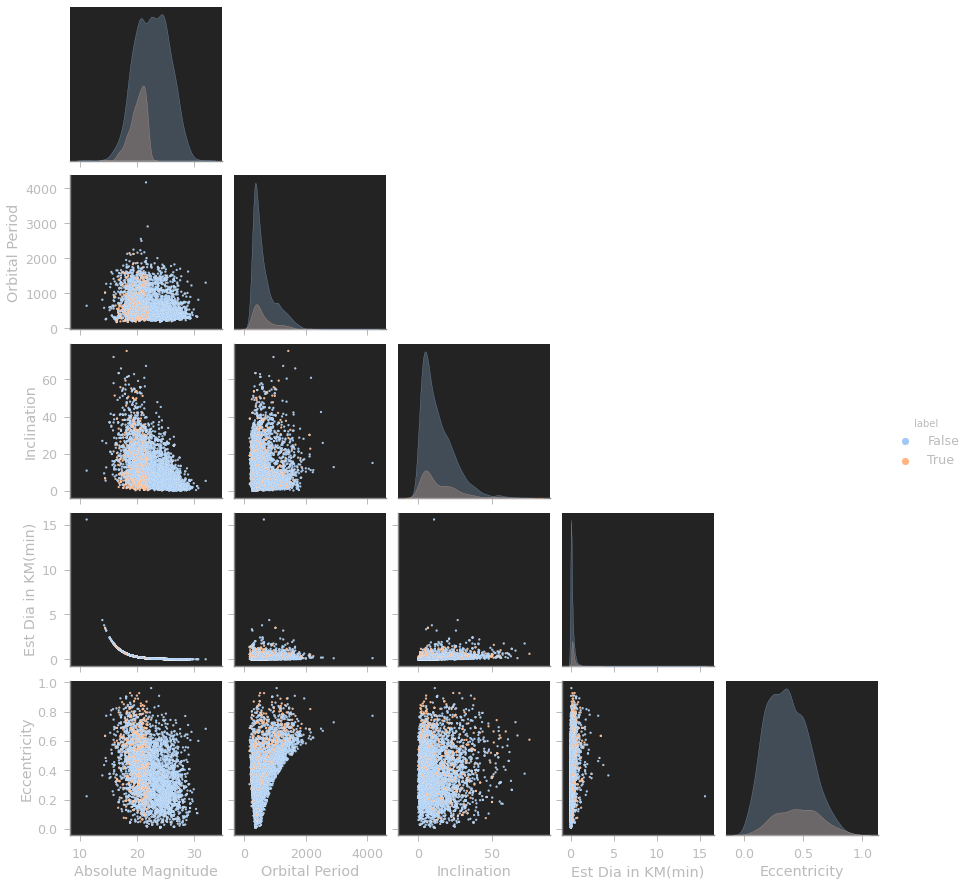

In [117]:
sns.pairplot(d, hue='label', diag_kind='kde',
             plot_kws={'s': 4}, palette='pastel',
             corner=True)